# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Observations
# 1: Highest temperature is found at 0 latitude and as the latidude increases or decreases, temperature drops.
# 2: Southern Hemisphere climates tend to be slightly milder than those at similar latitudes in the Northern Hemisphere.
# 3: Latitude doesn't have a correlation or strong influence on cloudiness in either hemisphere. 

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
import scipy.stats as st
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)


## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []
countries = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    country = citipy.nearest_city(lat_lng[0], lat_lng[1]).country_code
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)
        countries.append(country.upper())

# Print the city count to confirm sufficient count
print(len(cities))

#Print the country count to confirm it matches city count
print(len(countries))

663
663


In [4]:
# Create dataframe to store data
city_weather = pd.DataFrame({'City': cities, 'Country': countries,'Cloudiness': "", 'Date': "", 'Humidity': "",
                             'Lat': "", 'Lng': "", 'Max Temp': "", 'Windspeed': ""})

#Preview the dataframe
city_weather.head()

,City,Country,Cloudiness,Date,Humidity,Lat,Lng,Max Temp,Windspeed
0,taoudenni,ML,,,,,,,
1,senanga,ZM,,,,,,,
2,safwah,SA,,,,,,,
3,nanortalik,GL,,,,,,,
4,ringebu,NO,,,,,,,


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [5]:
#Variables to keep track of response number
#Setting at 1 to use 1-50 rather than 0-49 
record_num = 1
record_set = 1

#Base url to make the api call
base_url = 'http://api.openweathermap.org/data/2.5/weather?units=imperial&q='

#Run the API call for each city
print('''
-----------------------------
Beginning Data Retrieval
-----------------------------''')
for index, row in city_weather.iterrows(): 
    #Create the query url for the API call
    query_url = base_url + row['City'] + ',' + row['Country'] + ',' '&APPID=' + weather_api_key
    
    #API call
    response = requests.get(query_url).json()
    
    #Exception script in case the city is not found by the API call
    try: 
        #Meassage to alert the user that the data is being retrieved
        print(f'Processing Weather Data for Record {record_num} of Set {record_set} | {response["name"]}')
        
        #Input data into the dataframe
        city_weather.loc[index, 'Cloudiness'] = response['clouds']['all']
        city_weather.loc[index, 'Date'] = response['dt']
        city_weather.loc[index, 'Humidity'] = response['main']['humidity']
        city_weather.loc[index, 'Lat'] = response['coord']['lat']
        city_weather.loc[index, 'Lng'] = response['coord']['lon']
        city_weather.loc[index, 'Max Temp'] = response['main']['temp_max']
        city_weather.loc[index, 'Windspeed'] = response['wind']['speed']
        
        #Increase the record count
        record_num += 1
        
    except (KeyError, IndexError):
        print("City not found....Skipping............")
        
    #If statement to handle the API call limits
    if record_num == 51:
        record_set += 1
        record_num = 1
        time.sleep(10)
        
print('''
-----------------------------
Data Retrival Complete
-----------------------------''')


-----------------------------
Beginning Data Retrieval
-----------------------------
Processing Weather Data for Record 1 of Set 1 | Taoudenni
Processing Weather Data for Record 2 of Set 1 | Senanga
City not found....Skipping............
Processing Weather Data for Record 3 of Set 1 | Nanortalik
Processing Weather Data for Record 4 of Set 1 | Ringebu
Processing Weather Data for Record 5 of Set 1 | Tasiilaq
Processing Weather Data for Record 6 of Set 1 | Saint George
Processing Weather Data for Record 7 of Set 1 | Hong Kong
Processing Weather Data for Record 8 of Set 1 | Gizo Government Station
Processing Weather Data for Record 9 of Set 1 | Stoholm
Processing Weather Data for Record 10 of Set 1 | Ushuaia
Processing Weather Data for Record 11 of Set 1 | Brentwood
Processing Weather Data for Record 12 of Set 1 | Hilo
Processing Weather Data for Record 13 of Set 1 | Busselton
Processing Weather Data for Record 14 of Set 1 | Vaini
Processing Weather Data for Record 15 of Set 1 | Carnarvon

Processing Weather Data for Record 32 of Set 3 | Isabela
Processing Weather Data for Record 33 of Set 3 | Havre-St-Pierre
Processing Weather Data for Record 34 of Set 3 | Mpika
Processing Weather Data for Record 35 of Set 3 | Thinadhoo
Processing Weather Data for Record 36 of Set 3 | Riyadh
Processing Weather Data for Record 37 of Set 3 | Exmouth
Processing Weather Data for Record 38 of Set 3 | Taldan
Processing Weather Data for Record 39 of Set 3 | Gornozavodsk
Processing Weather Data for Record 40 of Set 3 | Xining
Processing Weather Data for Record 41 of Set 3 | Torbay
Processing Weather Data for Record 42 of Set 3 | Upernavik
Processing Weather Data for Record 43 of Set 3 | Trincomalee
Processing Weather Data for Record 44 of Set 3 | Moskovskiy
Processing Weather Data for Record 45 of Set 3 | Nizhniy Kuranakh
Processing Weather Data for Record 46 of Set 3 | Balkhash
Processing Weather Data for Record 47 of Set 3 | Sumter
Processing Weather Data for Record 48 of Set 3 | Cayenne
Proc

Processing Weather Data for Record 16 of Set 6 | Nioro
Processing Weather Data for Record 17 of Set 6 | Hay River
Processing Weather Data for Record 18 of Set 6 | Luwuk
Processing Weather Data for Record 19 of Set 6 | Kenora
Processing Weather Data for Record 20 of Set 6 | Vostok
Processing Weather Data for Record 21 of Set 6 | Marawi
City not found....Skipping............
Processing Weather Data for Record 22 of Set 6 | Nadym
Processing Weather Data for Record 23 of Set 6 | Pangkalanbuun
Processing Weather Data for Record 24 of Set 6 | Bac Lieu
Processing Weather Data for Record 25 of Set 6 | Kyren
Processing Weather Data for Record 26 of Set 6 | Richards Bay
Processing Weather Data for Record 27 of Set 6 | Pangnirtung
Processing Weather Data for Record 28 of Set 6 | Oshnavīyeh
Processing Weather Data for Record 29 of Set 6 | Mogocha
Processing Weather Data for Record 30 of Set 6 | Seoul
Processing Weather Data for Record 31 of Set 6 | Bernalillo
Processing Weather Data for Record 32 

Processing Weather Data for Record 1 of Set 9 | Taunsa
Processing Weather Data for Record 2 of Set 9 | Charters Towers
Processing Weather Data for Record 3 of Set 9 | Altamira
Processing Weather Data for Record 4 of Set 9 | Lata
Processing Weather Data for Record 5 of Set 9 | Phuthaditjhaba
Processing Weather Data for Record 6 of Set 9 | Derbent
Processing Weather Data for Record 7 of Set 9 | Adrar
Processing Weather Data for Record 8 of Set 9 | Hirara
City not found....Skipping............
Processing Weather Data for Record 9 of Set 9 | Saldanha
City not found....Skipping............
Processing Weather Data for Record 10 of Set 9 | Meulaboh
Processing Weather Data for Record 11 of Set 9 | Baturaja
Processing Weather Data for Record 12 of Set 9 | Sioux Lookout
Processing Weather Data for Record 13 of Set 9 | São Miguel do Tapuio
Processing Weather Data for Record 14 of Set 9 | Pacific Grove
Processing Weather Data for Record 15 of Set 9 | Nyzhnya Duvanka
Processing Weather Data for Rec

Processing Weather Data for Record 36 of Set 11 | Kokopo
Processing Weather Data for Record 37 of Set 11 | San Pedro de Ycuamandiyú
Processing Weather Data for Record 38 of Set 11 | Kilembe
Processing Weather Data for Record 39 of Set 11 | Rayong
Processing Weather Data for Record 40 of Set 11 | Shitanjing
Processing Weather Data for Record 41 of Set 11 | Koungou
Processing Weather Data for Record 42 of Set 11 | Nantucket
Processing Weather Data for Record 43 of Set 11 | Aasiaat
Processing Weather Data for Record 44 of Set 11 | Benghazi
Processing Weather Data for Record 45 of Set 11 | Marmande
Processing Weather Data for Record 46 of Set 11 | Ketchikan
Processing Weather Data for Record 47 of Set 11 | Port-Gentil
Processing Weather Data for Record 48 of Set 11 | Te Anau
Processing Weather Data for Record 49 of Set 11 | Anicuns
City not found....Skipping............
Processing Weather Data for Record 50 of Set 11 | Mount Gambier
Processing Weather Data for Record 1 of Set 12 | Arrecife

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [6]:
#weather_data = pd.DataFrame(city_weather)
city_weather.head()

,City,Country,Cloudiness,Date,Humidity,Lat,Lng,Max Temp,Windspeed
0,taoudenni,ML,0,1603217183,15,22.68,-3.98,88.02,9.15
1,senanga,ZM,0,1603217183,13,-16.12,23.27,83.25,5.14
2,safwah,SA,,,,,,,
3,nanortalik,GL,100,1603217184,85,60.14,-45.24,37.94,4.34
4,ringebu,NO,100,1603217184,94,61.52,10.17,30.99,3


In [7]:
# Export & Save Data Into a .csv.
#city_weather.to_csv("output_data/cities.csv")

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [8]:
#  Get the indices of cities that have humidity over 100%.


In [9]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".

#Clean dataframe to remove cities that were not found
city_weather['Max Temp'] = city_weather['Max Temp'].replace('', np.nan)
city_weather = city_weather.dropna()

#Preview the dataframe
city_weather.head()

,City,Country,Cloudiness,Date,Humidity,Lat,Lng,Max Temp,Windspeed
0,taoudenni,ML,0,1603217183,15,22.68,-3.98,88.02,9.15
1,senanga,ZM,0,1603217183,13,-16.12,23.27,83.25,5.14
3,nanortalik,GL,100,1603217184,85,60.14,-45.24,37.94,4.34
4,ringebu,NO,100,1603217184,94,61.52,10.17,30.99,3
5,tasiilaq,GL,75,1603217148,93,65.61,-37.64,32.00,20.8


In [10]:
# Export & Save Data Into a .csv.
city_weather.to_csv("output_data/cities.csv")


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

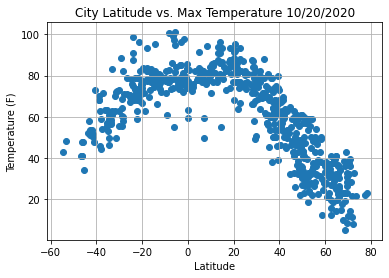

In [11]:
# Build a scatter plot for each data type
plt.scatter(city_weather["Lat"], city_weather["Max Temp"], marker="o")

# Incorporate the other graph properties
plt.title(f'City Latitude vs. Max Temperature {time.strftime("%m/%d/%Y")}')
plt.ylabel("Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/City Latitude vs. Max Temperature.png")

# Show plot
plt.show()

In [12]:
# Latitude vs Temperature plot shows a correlation between the latitude and temperature.

## Latitude vs. Humidity Plot

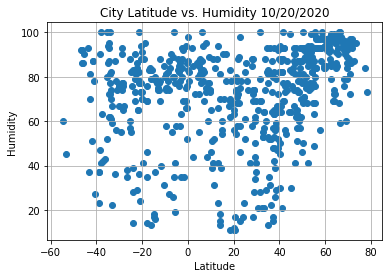

In [13]:
# Build a scatter plot for each data type
plt.scatter(city_weather["Lat"], city_weather["Humidity"], marker="o")

# Incorporate the other graph properties
plt.title(f'City Latitude vs. Humidity {time.strftime("%m/%d/%Y")}')
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/City Latitude vs. Humidity.png")

# Show plot
plt.show()

In [14]:
#In this Latitude vs Humidity plot we see there is not relation between latitude and humdity.

## Latitude vs. Cloudiness Plot

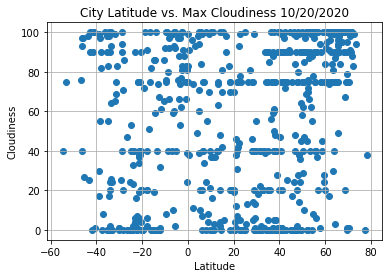

In [15]:
# Build a scatter plot for each data type
plt.scatter(city_weather["Lat"], city_weather["Cloudiness"], marker="o")

# Incorporate the other graph properties
plt.title(f'City Latitude vs. Max Cloudiness {time.strftime("%m/%d/%Y")}')
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/City Latitude vs. Cloudiness.png")

# Show plot
plt.show()

In [16]:
#Latitude vs Cloudiness shows no direct relation between the two factors.

## Latitude vs. Wind Speed Plot

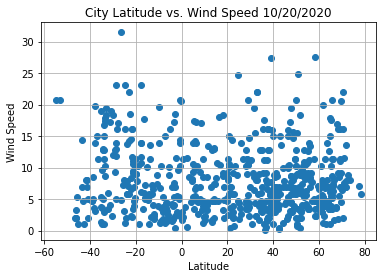

In [17]:
# Build a scatter plot for each data type
plt.scatter(city_weather["Lat"], city_weather["Windspeed"], marker="o")

# Incorporate the other graph properties
plt.title(f'City Latitude vs. Wind Speed {time.strftime("%m/%d/%Y")}')
plt.ylabel("Wind Speed")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/City Latitude vs. Wind Speed.png")

# Show plot
plt.show()

In [18]:
#Latitude vs Wind Speed there is a relation between latitude and wind speed but not as strong of a correlation as temperature.

## Linear Regression

In [36]:
# Define northern southern hemisphere
northern_hemisphere = city_weather.loc[city_weather["Lat"] >= 0]
southern_hemisphere = city_weather.loc[city_weather["Lat"] < 0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.7590865206214932


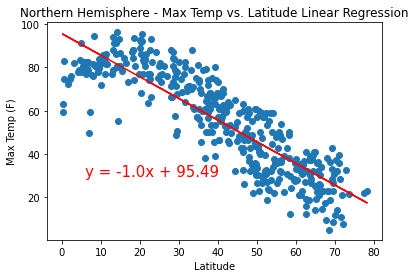

In [37]:
# Northern Hemisphere - Max Temp vs. Latitude Linear Regression
x_values = northern_hemisphere["Lat"].astype(float)
y_values = northern_hemisphere["Max Temp"].astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,30),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Max Temp (F)")
plt.title("Northern Hemisphere - Max Temp vs. Latitude Linear Regression")
print(f"The r-squared is: {rvalue**2}")
#plt.show()

# Save the figure
plt.savefig("output_data/Northern Hemisphere - Max Temp vs. Latitude Linear Regression.png")

In [38]:
#Based on the high r-squared value Temperature and Latitude are related for the Northern Hemisphere.

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.5468491978357117


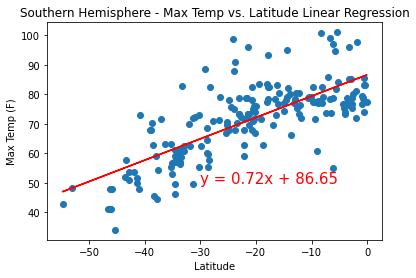

In [39]:
# Southern Hemisphere - Max Temp vs. Latitude Linear Regression
x_values = southern_hemisphere["Lat"].astype(float)
y_values = southern_hemisphere["Max Temp"].astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-30,50),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Max Temp (F)")
plt.title("Southern Hemisphere - Max Temp vs. Latitude Linear Regression")
print(f"The r-squared is: {rvalue**2}")
#plt.show()

# Save the figure
plt.savefig("output_data/Southern Hemisphere - Max Temp vs. Latitude Linear Regression.png")

In [40]:
#The r-squared value for Temperature and Latitude are acceptable but not as strong as the Northern Hemisphere.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.1510178434696638


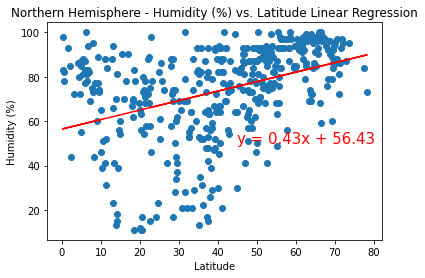

In [41]:
# Northern Hemisphere - Humidity vs. Latitude Linear Regression
x_values = northern_hemisphere["Lat"].astype(float)
y_values = northern_hemisphere["Humidity"].astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(45,50),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression")
print(f"The r-squared is: {rvalue**2}")
#plt.show()

# Save the figure
plt.savefig("output_data/Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression.png")

In [42]:
#This plot shows there is not a strong relation between Latitude and Humidity in the Northern Hemisphere.

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.00013436411497367936


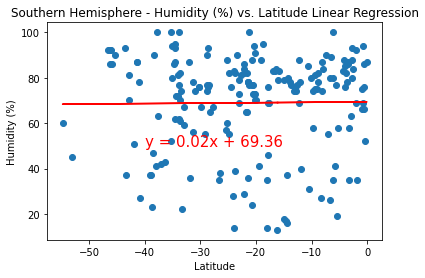

In [43]:
# Southern Hemisphere - Humidity vs. Latitude Linear Regression
x_values = southern_hemisphere["Lat"].astype(float)
y_values = southern_hemisphere["Humidity"].astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-40,50),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression")
print(f"The r-squared is: {rvalue**2}")
#plt.show()

# Save the figure
plt.savefig("output_data/Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression.png")

In [44]:
#This plot is ever more sparce than the Northern Hemisphere and shows no strong relation between Latitude and Humidity.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.1024690993432722


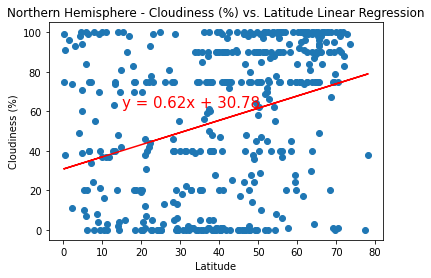

In [45]:
# Northern Hemisphere - Cloudiness vs. Latitude Linear Regression
x_values = northern_hemisphere["Lat"].astype(float)
y_values = northern_hemisphere["Cloudiness"].astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(15,62),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression")
print(f"The r-squared is: {rvalue**2}")
#plt.show()

# Save the figure
plt.savefig("output_data/Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression.png")

In [46]:
#There is not strong connection between Latitude and Cloudiness.

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.0211371003745239


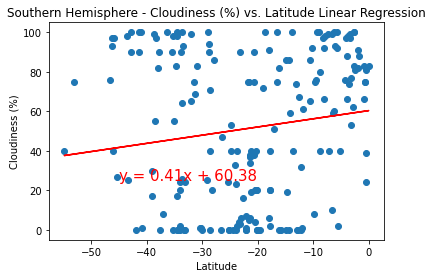

In [47]:
# Southern Hemisphere - Cloudiness vs. Latitude Linear Regression
x_values = southern_hemisphere["Lat"].astype(float)
y_values = southern_hemisphere["Cloudiness"].astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-45,25),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression")
print(f"The r-squared is: {rvalue**2}")
#plt.show()

# Save the figure
plt.savefig("output_data/Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression.png")

In [48]:
#This plot is even further spread out than the Northen Hemisphere and has no strong connection between Latitude and Cloudiness.

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.0029577656692986835


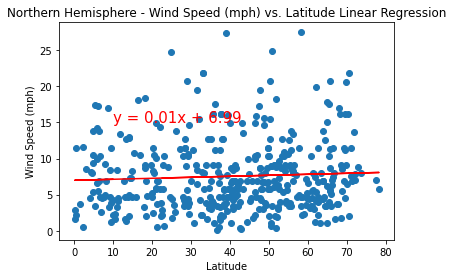

In [49]:
# Northern Hemisphere - Wind Speed vs. Latitude Linear Regression
x_values = northern_hemisphere["Lat"].astype(float)
y_values = northern_hemisphere["Windspeed"].astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(10,15),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title("Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression")
print(f"The r-squared is: {rvalue**2}")
#plt.show()

# Save the figure
plt.savefig("output_data/Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression.png")

In [50]:
#This plot shows a relation between Latitude and Wind Speed in the Northern Hemisphere.

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.01895580373414936


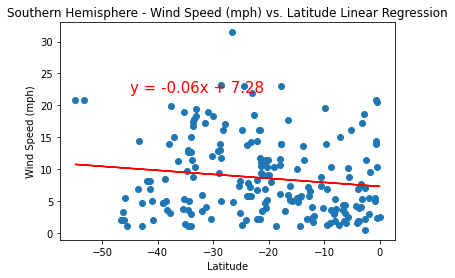

In [51]:
# Southern Hemisphere - Wind Speed vs. Latitude Linear Regression
x_values = southern_hemisphere["Lat"].astype(float)
y_values = southern_hemisphere["Windspeed"].astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-45,22),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title("Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression")
print(f"The r-squared is: {rvalue**2}")
#plt.show()

# Save the figure
plt.savefig("output_data/Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression.png")

In [35]:
#The Southern Hemisphere shows less of a correlation between Latitude and Wind Speed in the Southern Hemisphere.